In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sparse
from pyusadel import DifferentialOperators, UsadelProblem, gradient, laplacian

# Setup

In [2]:
Ny = 21
Nx = 21
Nsites = Nx * Ny

x_ax = np.linspace(-10, 10, Nx)
dx = x_ax[1] - x_ax[0]

y_ax = np.linspace(0, 20, Ny)
dy = y_ax[1] - y_ax[0]

x, y = np.meshgrid(x_ax, y_ax, indexing="ij")

In [3]:
T_c0 = 1
Delta_00 = T_c0 * 1.7652
h_c0 = Delta_00 / np.sqrt(2)

D = 1**2 * Delta_00
xi_00 = np.sqrt(D / Delta_00)

In [4]:
h_x_2D = np.zeros((Nx, Ny), dtype=float)
h_y_2D = np.zeros((Nx, Ny), dtype=float)
h_z_2D = np.zeros((Nx, Ny), dtype=float)

h_x_2D[: Nx // 2, : Ny // 2] = -1.5
h_x_2D[Nx // 2 :, : Ny // 2] = +1.5

h_x = h_x_2D.flatten()
h_y = h_y_2D.flatten()
h_z = h_z_2D.flatten()

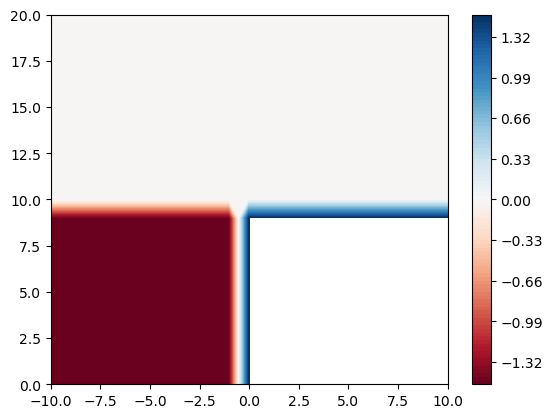

In [5]:
im = plt.contourf(x, y, h_x_2D, cmap="RdBu", levels=101)
plt.colorbar(im)

In [6]:
I_y = sparse.eye(Ny)
I_x = sparse.eye(Nx)
D_x = sparse.kron(gradient(Nx, dx, "open"), I_y)
D_y = sparse.kron(I_x, gradient(Ny, dy, "open"))

L_x = laplacian(Nx, dx, "open")
L_y = laplacian(Ny, dy, "open")
L = sparse.kron(I_x, L_y) + sparse.kron(L_x, I_y)

diff_ops = DifferentialOperators()
diff_ops.D_x = D_x
diff_ops.D_y = D_y
diff_ops.D_z = 0 * D_x
diff_ops.L = L

In [7]:
T_c0 = 1
Delta_00 = T_c0 * 1.7652
h_c0 = Delta_00 / np.sqrt(2)

D = (1**2) * Delta_00
xi_00 = np.sqrt(D / Delta_00)
tau_so_inv = 0.0 * h_x
tau_sf_inv = 0.0 * h_x
T = 0.2
Gamma = 1e-4

up = UsadelProblem(
    Nsites=Nx * Ny,
    diff_ops=diff_ops,
    h_x=h_x,
    h_y=h_y,
    h_z=h_z,
    tau_sf_inv=tau_sf_inv,
    tau_so_inv=tau_so_inv,
    D=D,
    T=T,
    T_c0=T_c0,
    Gamma=Gamma,
)

In [8]:
up.Delta = np.zeros((Nx * Ny), dtype=float) + 1.764

In [9]:
up.solve_self_consistent(verbose=True)

  1    Max Delta: 1.764    Residual: 8.83e-03    Free energy: -2.09e+02
  2    Max Delta: 1.764    Residual: 8.18e-03    Free energy: -2.11e+02
  3    Max Delta: 1.764    Residual: 7.60e-03    Free energy: -2.13e+02
  4    Max Delta: 1.764    Residual: 7.17e-03    Free energy: -2.14e+02
  5    Max Delta: 1.764    Residual: 6.86e-03    Free energy: -2.16e+02
  6    Max Delta: 1.764    Residual: 6.66e-03    Free energy: -2.17e+02
  7    Max Delta: 1.764    Residual: 6.55e-03    Free energy: -2.18e+02
  8    Max Delta: 1.764    Residual: 6.54e-03    Free energy: -2.19e+02
  9    Max Delta: 1.764    Residual: 6.60e-03    Free energy: -2.20e+02
 10    Max Delta: 1.764    Residual: 6.75e-03    Free energy: -2.21e+02
 11    Max Delta: 1.764    Residual: 6.99e-03    Free energy: -2.23e+02
 12    Max Delta: 1.764    Residual: 7.31e-03    Free energy: -2.24e+02
 13    Max Delta: 1.764    Residual: 7.72e-03    Free energy: -2.25e+02
 14    Max Delta: 1.764    Residual: 8.21e-03    Free energy: -2

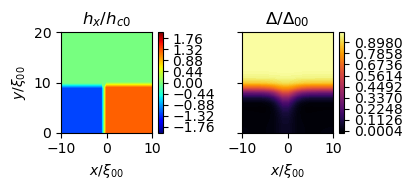

In [11]:
Delta_2D = up.Delta.reshape((Ny, Nx))

fig, ax = plt.subplots(figsize=(4.2, 2), ncols=2, sharey=True)
im0 = ax[0].contourf(
    x / xi_00,
    y / xi_00,
    h_x.reshape(Nx, Ny) / h_c0,
    cmap="jet",
    levels=np.linspace(-2, 2, 101),
)
ax[0].set_xlabel(r"$x/\xi_{00}$")
ax[0].set_ylabel(r"$y/\xi_{00}$")
cb0 = fig.colorbar(im0, ax=ax[0])
ax[0].set_title(r"$h_x / h_{c0}$")

im1 = ax[1].contourf(
    x / xi_00,
    y / xi_00,
    up.Delta.reshape(Nx, Ny) / Delta_00,
    cmap="inferno",
    levels=np.linspace(-0.02, 1, 101),
)
ax[1].set_xlabel(r"$x/\xi_{00}$")
# ax[1].set_ylabel(r"$y/\xi_{00}$")
fig.colorbar(im1, ax=ax[1])
ax[1].set_title(r"$\Delta / \Delta_{00}$")
fig.tight_layout()

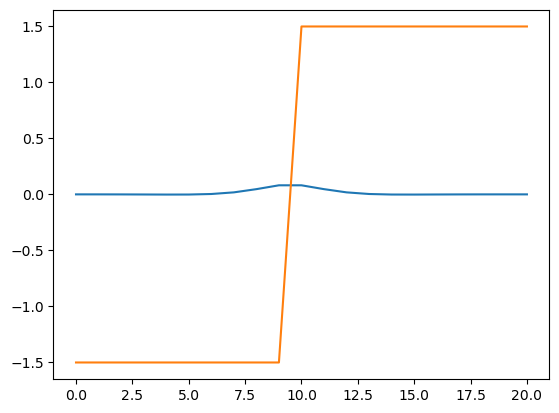

In [12]:
plt.plot(up.Delta.reshape(Nx, Ny)[:, 0])
plt.plot(up.h_x.reshape(Nx, Ny)[:, 0])

In [14]:
up.set_real_omega_ax(-3, 3, 101)
up.solve_spectral(
    gamma=0.5, tol=1e-6, max_iter=1000, print_exit_status=True#, use_dense=True
)

omega=3.00 : converged.
omega=2.94 : converged.
omega=2.88 : converged.
omega=2.82 : converged.
omega=2.76 : converged.
omega=2.70 : converged.
omega=2.64 : converged.
omega=2.58 : converged.
omega=2.52 : converged.
omega=2.46 : converged.
omega=2.40 : converged.
omega=2.34 : converged.
omega=2.28 : converged.
omega=2.22 : converged.
omega=2.16 : converged.
omega=2.10 : converged.
omega=2.04 : converged.
omega=1.98 : converged.
omega=1.92 : converged.
omega=1.86 : converged.
omega=1.80 : converged.
omega=1.74 : converged.
omega=1.68 : converged.
omega=1.62 : converged.
omega=1.56 : converged.
omega=1.50 : converged.
omega=1.44 : converged.
omega=1.38 : converged.
omega=1.32 : converged.
omega=1.26 : converged.
omega=1.20 : converged.
omega=1.14 : converged.
omega=1.08 : converged.
omega=1.02 : converged.
omega=0.96 : converged.
omega=0.90 : converged.
omega=0.84 : converged.
omega=0.78 : converged.
omega=0.72 : converged.
omega=0.66 : converged.
omega=0.60 : converged.
omega=0.54 : con

In [15]:
N_0_2D = up.get_ldos().reshape((omega_N, Ny, Nx))
omega_ax = up.get_omega_ax_r()

NameError: name 'omega_N' is not defined

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(6, 2), sharey=True)

ax[0].plot(
    N_0_2D[:, 0, 5],
    omega_ax,
)
ax[1].plot(
    N_0_2D[:, 0, 8],
    omega_ax,
)
ax[2].plot(
    N_0_2D[:, 0, 12],
    omega_ax,
)
ax[3].plot(
    N_0_2D[:, 0, 16],
    omega_ax,
)

fig.tight_layout()